# Synthesize data using CTGAN & evaluate quality of synthetic dataset using SDMetrics

## Overview

Evaluate quality of the synthetic dataset generated by comparing with that of real dataset across 3 categories of metrics which are :-

1. **Statistical metrics** which use statistical tests to compare the distributions of the real and synthetic distributions.
2. **Adversarial metrics** which use machine learning to try to distinguish between real and synthetic data.
3. **Descriptive metrics** which compute descriptive statistics on the real and synthetic datasets independently and then compare the values.

*For more information refer [here.](https://sdv-dev.github.io/SDMetrics/index.html)*

This notebook generates synthetic data using *CTGAN* module and uses *SDMetrics* to evaluate the quality of the generated datasets. We demostrate this on the Boston housing price demo dataset in scikit learn

In [27]:
# Load the required packages
import numpy as np
import pandas as pd
from ctgan import CTGANSynthesizer
from sdmetrics import evaluate
from collections import defaultdict

In [23]:
# Load data
train = pd.read_csv('data/porto_seguro_safe_driver/train.csv')

In [24]:
# Handle missing values

def filling_missing_values(data):
    '''A function to fill in the missing values of categorical features'''
    for i in data.columns.values:
        if data.isnull().values.any():
            if i == 'ps_car_03_cat' or i == 'ps_car_05_cat':
                continue
            elif i == 'ps_ind_05_cat' or i == 'ps_car_07_cat':
                data[i].fillna(data[i].mode()[0], inplace=True)
            else:
                data[i].fillna(data[i].mean(), inplace=True)
        else:
            continue
    return data


# Determine missing values in each column of the given dataframe
def missing_values(data):
    '''Function to find the percentage of missing values in each column of a DataFrame passed'''
    for i in data.columns.values:
        count =  data[data[i] == -1].shape[0]
        print("Missing Values in '{}' : {:.4f} %".format(i, (count/data.shape[0])*100))
        

train = train.replace(-1, np.nan)
train = train.replace(-1, np.nan)
        
# Fill missing values in train and test        
train = filling_missing_values(train) 

# Check for missing values after filling
# missing_values(train)
# missing_values(test)

# Drop columns that are not needed
col_to_drop = list(train.columns[train.columns.str.startswith('ps_calc_')])
# Drop columns that are missing a lot of values
col_to_drop += ['ps_car_03_cat', 'ps_car_05_cat']
train = train.drop(col_to_drop, axis=1)  

## Genrating Synthetic data using CTGAN

In [26]:
# Generate data using GANs to handle class imbalance

# Preprocess data for GAN sampling

train_gen = train.loc[train.target==1, train.columns != 'target'].copy()
train_gen = train_gen.drop(['id'], axis=1)

# List of categorical features
cat_features = [a for a in train_gen.columns if a.endswith('cat')]

ctgan = CTGANSynthesizer()
ctgan.fit(train_gen, cat_features, epochs=5)

synthetic_dataset = ctgan.sample(len(train_gen))

Epoch 1, Loss G: 2.1191, Loss D: -0.3219
Epoch 2, Loss G: 0.2600, Loss D: 0.1512
Epoch 3, Loss G: 0.2947, Loss D: -0.2764
Epoch 4, Loss G: -0.0831, Loss D: 0.3205
Epoch 5, Loss G: 0.0924, Loss D: 0.1991


In [41]:
# Create Metadata
from sdv import Metadata

real_tables = {
    "driving_insurance": train_gen
}
synthetic_tables = {
    "driving_insurance": synthetic_dataset
}

# Specify field properties for categorical columns
driving_insurance_fields = defaultdict()

for i in cat_features:
    driving_insurance_fields[i] = {'type':'categorical'}

metadata = Metadata()
metadata.add_table("driving_insurance", data = train_gen, fields_metadata=driving_insurance_fields)

## Evaluation with SDMetrics

In [42]:
report = evaluate(metadata, real_tables, synthetic_tables)

# Print an overall metric value which is a composite score combining all metrics
print(report.overall())

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.0, 7.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.4169919462839149, 13.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.4169919462839149, 12.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.4169919462839149, 16.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (5.0, 8.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.0, 8.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.0, 12.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (5.0, 12.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.0, 5.0) i

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.297604624394015, 1.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (7.0, 1.3597990574726553) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (11.0, 1.3597990574726553) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.297604624394015, 4.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistica

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.297604624394015, 103.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.0, 17.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.297604624394015, 87.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.297604624394015, 65.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:2

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 38.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 84.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 22.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 80.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 60.0

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (6.0, 0.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.0, 10.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (6.0, 10.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (9.0, 6.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (8.0, 5.0) i

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (2.0, 0.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (17.0, 8.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (13.0, 0.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (15.0, 8.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (13.0, 2.0)

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (14.0, 1.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (14.0, 97.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (15.0, 18.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (11.0, 33.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (17.0, 

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 39.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.3311179985302106, 4.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.3311179985302106, 1.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (1.3311179985302106, 5.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (2.0, 104.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 78.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 54.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (0.0, 86.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (103.0, 1

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (103.0, 8.297604624394015) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (87.0, 8.297604624394015) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (65.0, 8.297604624394015) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (70.0, 1.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:2

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (94.0, 6.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (18.0, 5.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (24.0, 6.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (68.0, 7.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (22.0, 6.0

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (39.0, 0.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (84.0, 1.3311179985302106) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (60.0, 1.3311179985302106) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarning: Unexpected value (35.0, 1.0) in synthetic data.
  warnings.warn("Unexpected value %s in synthetic data." % (value,))
//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/statistical/utils.py:23: UserWarnin

-140.71225173805848


In [43]:
# Highlights where the model performs poorly
# Here for example markdownx variables are modelled poorly as suggested by the Kolmogorov–Smirnov test
report.highlights()

,Columns,Goal,Misc. Tags,Name,Tables,Unit,Value
0,column:ps_car_13,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,2.774085e-206
1,column:ps_ind_11_bin,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
2,column:ps_ind_14,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
3,column:ps_car_15,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,7.927811e-245
4,column:ps_ind_06_bin,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
5,column:ps_ind_17_bin,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
6,column:ps_car_11,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
7,column:ps_ind_08_bin,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00
8,column:ps_car_12,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,3.310426e-230
9,column:ps_ind_18_bin,Goal.MAXIMIZE,"statistic:univariate,priority:high",kstest,table:driving_insurance,p-value,0.000000e+00


## Generate visualization of the metrics

//anaconda3/envs/gan_env/lib/python3.7/site-packages/sdmetrics/report.py:247: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=2.0)


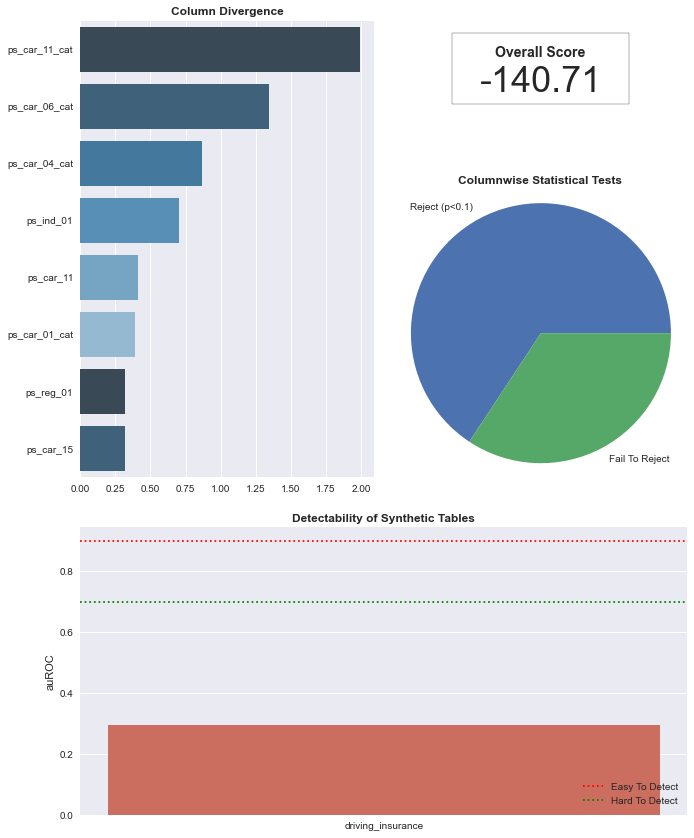

In [44]:
%matplotlib inline
report.visualize().savefig("visualize.png");

In [45]:
report.details()

,Columns,Goal,Misc. Tags,Name,Tables,Unit,Value
0,,Goal.MINIMIZE,detection:auroc,logistic,table:driving_insurance,auroc,8.414761e-01
1,column:ps_ind_02_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.803738e-01
2,column:ps_ind_04_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,8.092770e-01
3,column:ps_ind_05_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.999997e-01
4,column:ps_car_01_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.999998e-01
5,column:ps_car_02_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.462853e-01
6,column:ps_car_04_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.999996e-01
7,column:ps_car_06_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,1.000000e+00
8,column:ps_car_07_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.624841e-01
9,column:ps_car_08_cat,Goal.MAXIMIZE,statistic:univariate,chisquare,table:driving_insurance,p-value,9.858398e-01
